# Project: Investigate a Dataset - [noshowappointments]

## INTRODUCTION

In this project, We will investigate the No_show_appointments dataset. This dataset collects data from over 100k medical appointments in Brazil and tends to focus on whether or not patients attend their appointments. This dataset consist of 14 characteristics which are explained below

- PatientId: Patient Identification number
- AppointmentId: Appointment Identification number
- Gender: Sex(Female or Male)
- ScheduledDay: The day the patient is set up for an appointment
- AppointmentDay: The day the patient visit the doctor
- Age: How old is the patient
- Neighbourhood: Location of the hospital
- Scholarship: whether or not the patient is enrolled in Brasilian welfare program [Bosla Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hypertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handicap: True or False
- SMS_received: Whether or not the patient recieved sms(True or False)
- No-show: Whether or not the patient attended the appointment

## QUESTIONS 

 - What is the age distribution of patients and which age group were mostly scheduled for an appointment?
 - How many percent of patients attended/missed their scheduled appointment?
 - what is the gender distribution for patients show/no_show patients?
 - which age group were attended their appointment
 - Did sms messages influence the patients showing up for their appointment?

## IMPORTING THE NECESSARY PYTHON LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## **ACCESSING THE CSV FILE**

In [2]:
no_show_a = pd.read_csv(r"C:\Users\SHIJI\ALX-T\module_1_project\noshowappointments-kagglev2-may-2016.csv")
no_show_a.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# to get the dimension of the dataset
no_show_a.shape

(110527, 14)

In [4]:
# to get further information on the dataset
no_show_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#let's confirm if there are duplicate values
sum(no_show_a.duplicated())

0

In [6]:
# to get statistical information on the dataset
no_show_a.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# to get the count of unique value in the age column

no_show_a['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

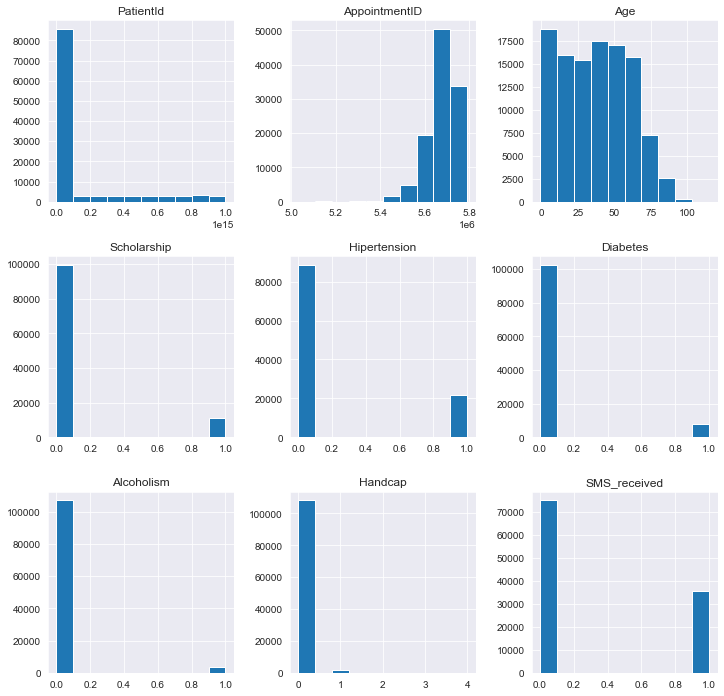

In [8]:
no_show_a.hist(figsize = (12,12));

After wrangling, I noticed that:  
* there are no duplicate values and there are not null values,
* the datatype of some column's needs to be changed,
- some of the column's name needs to be changed such as (hipertension, no-show),
- there is an age of -1 which is assumed to be an error.

## **CLEANING THE DATA**

In [9]:
#removing the scientific notation in the patientid column
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [10]:
#renaming the 'PatientId','AppointmentID','ScheduledDay','AppointmentDay','Hypertension','No-show' columns
column_indices = [0,1,3,4,8,11,13]
new_names = ['Patient_Id','Appointment_ID','Scheduled_Day','Appointment_Day','Hypertension', 'handicap', 'No_show']
old_names = no_show_a.columns[column_indices]
no_show_a.rename(columns=dict(zip(old_names, new_names)),inplace = True)

In [11]:
#lets change all columns name to lower case

no_show_a.rename(columns=lambda x: x.strip().lower(), inplace = True)

In [12]:
#change the scheduled_day and appointment_day datatype

no_show_a[['appointment_day','scheduled_day']] = no_show_a[['appointment_day','scheduled_day']].apply(pd.to_datetime, errors='coerce')

In [13]:
#change the patient_id and appointment_id datatype to integer

for b in ['patient_id', 'appointment_id']:
    no_show_a[b] = no_show_a[b].astype(int)

In [14]:
#change the scholarship, hypertension, diabetes,alcoholism, handicap, sms_received datatype to boolean

for b in ['scholarship','hypertension','diabetes','alcoholism','handicap','sms_received']:
    no_show_a[b] = no_show_a[b].astype(bool)

In [15]:
#change the gender datatype to category

no_show_a['gender'] = no_show_a['gender'].astype('category')

In [16]:
#removing the age -1 from the dataframe
no_show_a.drop(no_show_a[no_show_a.age < 0].index, inplace=True)

In [17]:
no_show_a.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [18]:
#to confirm our changes

no_show_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  int32              
 1   appointment_id   110526 non-null  int32              
 2   gender           110526 non-null  category           
 3   scheduled_day    110526 non-null  datetime64[ns, UTC]
 4   appointment_day  110526 non-null  datetime64[ns, UTC]
 5   age              110526 non-null  int64              
 6   neighbourhood    110526 non-null  object             
 7   scholarship      110526 non-null  bool               
 8   hypertension     110526 non-null  bool               
 9   diabetes         110526 non-null  bool               
 10  alcoholism       110526 non-null  bool               
 11  handicap         110526 non-null  bool               
 12  sms_received     110526 non-null  bool               
 13 

## EXPLORATORY DATA ANALYSIS

In [19]:
no_show_a.describe()

,patient_id,appointment_id,age
count,110526,110526,110526
mean,-2140311086,5675304,37
std,150849237,71295,23
min,-2147483648,5030230,0
25%,-2147483648,5640285,18
50%,-2147483648,5680572,37
75%,-2147483648,5725523,55
max,2141273554,5790484,115


In [20]:
# to get the count of unique value in the gender column

no_show_a['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [21]:
# to get the top count of unique value in the age column

no_show_a['age'].value_counts().head()

0     3539
1     2273
52    1746
49    1652
53    1651
Name: age, dtype: int64

Text(0, 0.5, 'appointment count')

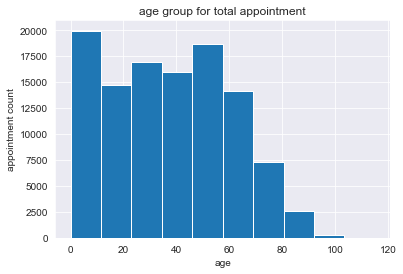

In [22]:
no_show_a['age'].plot(kind = 'hist', title = 'age group for total appointment')
plt.xlabel('age', fontsize=10)
plt.ylabel('appointment count', fontsize=10)

From here we can see that ages 0-1 which are babies were most scheduled for an appointment while the erderly were less scheduled for an appointment

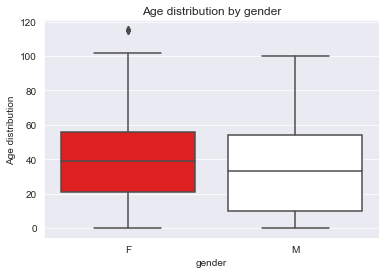

In [23]:
age_dist = sns.boxplot(data = no_show_a, x = 'gender', y = 'age', palette=['r', 'w'])
age_dist.set(xlabel= 'gender', ylabel='Age distribution', title='Age distribution by gender')
plt.show()

We can see that over 50% of our dataset consist of females with wider age distribution and there are some outliers in the female section

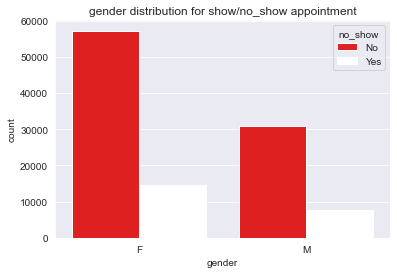

In [24]:
ax = sns.countplot(x ='gender', hue = "no_show",palette=['r', 'w'], data = no_show_a)
ax.set_title('gender distribution for show/no_show appointment');

From the bar chart, we can see that the number of female who attended the appointment are more the the male. We cannot conclude with the chart because form the dataset, we have more females than males. To get the final conclusion, we have to do a proportion of gender who show/ no_show over the total gender in the dataset.

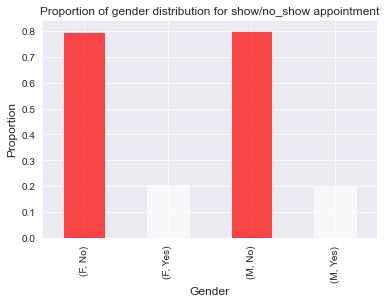

In [25]:
count_gender = no_show_a.groupby(['gender', 'no_show'])['appointment_id'].count()
total_gender = no_show_a.groupby(['gender'])['appointment_id'].count()
colors = ['red','white']
proportions = count_gender / total_gender
proportions.plot(kind='bar', title='Proportion of gender distribution for show/no_show appointment', color=colors, alpha=.7);
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion', fontsize=12);

This chart is showing the proprtion of female and male who show/no_show for the appointment. From this chart, we can conclude that equal number of female and male didn't miss the appoinment

In [26]:
no_show_up = no_show_a.query("no_show == 'Yes'")

In [27]:
show_up = no_show_a.query("no_show == 'No'")

In [28]:
missed = int(round(len(no_show_up) / len(no_show_a) * 100))

In [29]:
not_missed = int(round(len(show_up) / len(no_show_a) * 100))

In [30]:
def plots(x,y):
    no_show_a.groupby([x])['appointment_id'].count().plot(kind = y)
    plt.title(("Patient per " + x))
    plt.xlabel(x)
    plt.ylabel('appointment count')
    z = no_show_a.groupby([x])['appointment_id'].count()
    print(z)

no_show
No     88207
Yes    22319
Name: appointment_id, dtype: int64
20% of the appointments were missed and 80% attended.


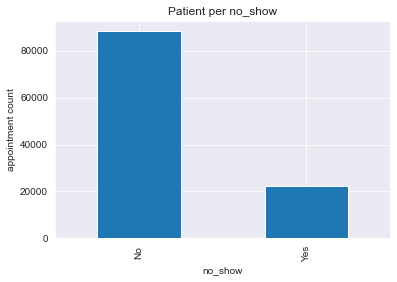

In [31]:
plots('no_show', 'bar')
print('{}% of the appointments were missed and {}% attended.'.format(missed, not_missed))

we can see that 80% patients attended their appointment and only 20% missed their appointment 

Text(0, 0.5, 'appointment count')

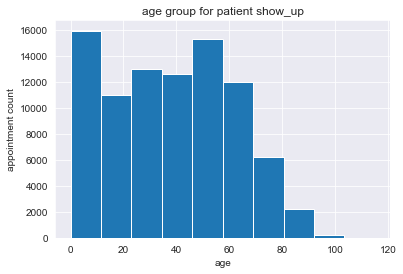

In [32]:
show_up['age'].plot(kind = 'hist', title = 'age group for patient show_up')
plt.xlabel('age', fontsize=10)
plt.ylabel('appointment count', fontsize=10)

Text(0, 0.5, 'appointment count')

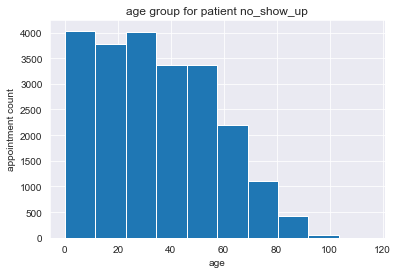

In [33]:
no_show_up['age'].plot(kind = 'hist', title = 'age group for patient no_show_up')
plt.xlabel('age', fontsize=10)
plt.ylabel('appointment count', fontsize=10)

The charts above shows us the age group of patients that showed up / didnt show up for their appointment

sms_received
False    75044
True     35482
Name: appointment_id, dtype: int64


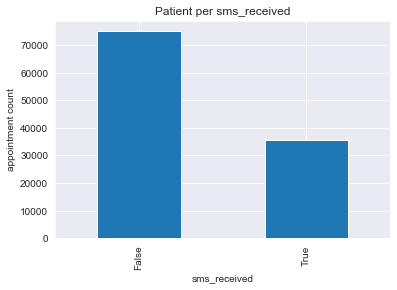

In [34]:
plots('sms_received', 'bar')

From the bar chart above, it shows that most patients didnt recieve sms messages

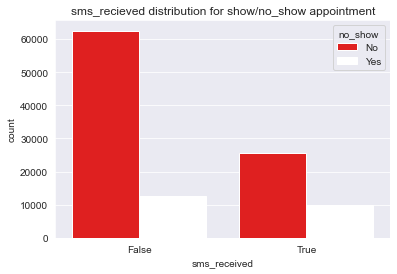

In [35]:
ax= sns.countplot(x ='sms_received', hue = "no_show",palette=['r', 'w'], data = no_show_a)
ax.set_title('sms_recieved distribution for show/no_show appointment');

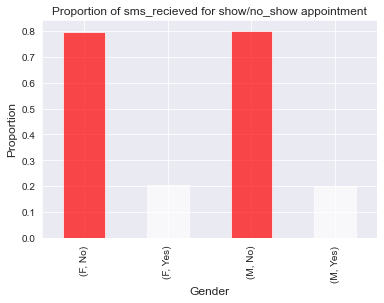

In [36]:
count_sms = no_show_a.groupby(['sms_received', 'no_show'])['appointment_id'].count()
total_sms = no_show_a.groupby(['sms_received'])['appointment_id'].count()
colors = ['red','white']
proportions = count_gender / total_gender
proportions.plot(kind='bar', title='Proportion of sms_recieved for show/no_show appointment', color=colors, alpha=.7);
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion', fontsize=12);

From this chart;
- (False, No) means patients who did not recieve sms but showed up 
- (False, Yes) means patients who did not recieve sms but didnt show up 
- (True, No)means patients who recieved sms but showed up
- (True, Yes) means patients who recieved sms but didnt show up
- This plot shows that most patients showed up for their appointment whether they recieved SMS or not.

## CONCLUSIONS

**Results:** From the analysis above, we can conclude that:
- Babies from ages (0-1) were sceduled for an appointment
- More females were scheduled for an appointment
- When comparing the gender distribution of patients who attended their appointments with those who did not, there is not a significant difference.
- There is no significant difference in the age distribution of patients who attended the appointment versus the patients who did not attend the appointment.
- 80% of patients attended their appointment
- There is a higher percentage of patients who did not recieve an SMS but did show up than people  who recieved an SMS but did  show up

**Limitations:**
- cannot show strong correlations between factors since most of our data is categorical.
- The statistics used here are descriptive statistics, not inferential, meaning that we did not create any hypotheses or controlled experiments or inferences with our data
- Most of our variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlations 